In [4]:
%pylab inline
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


# Computing the CM 

## Basic approach:

In [5]:
# Random points in a sphere:

r = random.random(1000) 
theta = random.random(1000) * 2 - 1
phi = random.random(1000) * 2 * np.pi

x1 = r**(1/3.0) * sin(arccos(theta)) * sin(phi)
y1 = r**(1/3.0) * sin(arccos(theta)) * cos(phi)
z1 = r**(1/3.0) * theta

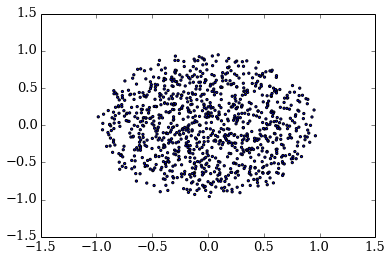

In [6]:
scatter(x1, z1, s=5)

In [7]:
# CM coordinates:
xCM = sum(x1)/len(x1)
yCM = sum(y1)/len(y1)
zCM = sum(z1)/len(z1)

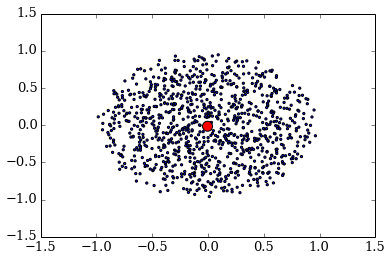

In [8]:
scatter(x1, z1, s=5)
scatter(xCM, zCM, s=100, c='r')

## Iterative approach:


In [9]:
def CM(x, y, z, vx, vy, vz, delta):
    
    N = len(x)
    xCM = sum(x)/len(x)
    yCM = sum(y)/len(y)
    zCM = sum(z)/len(z)

    xCM_new = [xCM]
    yCM_new = [yCM]
    zCM_new = [zCM]

    xCM = 0.0
    yCM = 0.0
    zCM = 0.0
    
    vxCM_new = [sum(vx)/N]
    vyCM_new = [sum(vy)/N]
    vzCM_new = [sum(vz)/N]

    while (np.sqrt((xCM_new[-1]-xCM)**2 + (yCM_new[-1]-yCM)**2 +(zCM_new[-1]-zCM)**2) > delta):
        xCM = xCM_new[-1]
        yCM = yCM_new[-1]
        zCM = zCM_new[-1]
        Rcm = np.sqrt(xCM**2 + yCM**2 + zCM**2)
        R = np.sqrt((x - xCM)**2 + (y - yCM)**2 + (z - zCM)**2)
        Rmax = max(R)
        index = where(R<Rmax/2.0)
        x = x[index]
        y = y[index]
        z = z[index]
        vx = vx[index]
        vy = vy[index]
        vz = vz[index]
        #print Rmax
        N = len(x)
        xCM_new.append(sum(x)/N)
        yCM_new.append(sum(y)/N)
        zCM_new.append(sum(z)/N)
        vxCM_new.append(sum(vx)/N)
        vyCM_new.append(sum(vy)/N)
        vzCM_new.append(sum(vz)/N)
        #scatter(xCM_new, yCM_new)

    print N
    return xCM_new, yCM_new, zCM_new, vxCM_new, vyCM_new, vzCM_new

In [10]:
CM(x1, y1, z1, 0, 0, 0, 0.5)


1000


([-0.0049080719301580443],
 [0.012173819315515555],
 [-0.014382404884602159],
 [0],
 [0],
 [0])

# Testing the code in a simulation snapshot:

In [11]:
from pygadgetreader import *

In [12]:
positions = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pos', 'dm')
velocities = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'vel', 'dm')
particles_ids = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pid', 'dm')
disk = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pos', 'disk')
vdisk = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'vel', 'disk')
bulge = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pos', 'bulge')
vbulge = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'vel', 'bulge')

#potential = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pot', 'dm')



Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning BULGE Positions
Returning BULGE Velocities


In [13]:
X = sort(particles_ids)
limit = X[29999]
index_mw = where(particles_ids<=49376)
index_LMC = where(particles_ids>49376)

In [14]:
print X
print limit
print len(X)
print int(len(X)/2.0 - 1.0)

[    1     2     3 ..., 79998 79999 80000]
49376
60000
29999


In [15]:
x_sim_mw = positions[index_mw[0],0]
y_sim_mw = positions[index_mw[0],1]
z_sim_mw = positions[index_mw[0],2]

x_sim_lmc = positions[index_LMC[0],0]
y_sim_lmc = positions[index_LMC[0],1]
z_sim_lmc = positions[index_LMC[0],2]

vx_sim_mw = velocities[index_mw[0],0]
vy_sim_mw = velocities[index_mw[0],1]
vz_sim_mw = velocities[index_mw[0],2]

vx_sim_lmc = velocities[index_LMC[0],0]
vy_sim_lmc = velocities[index_LMC[0],1]
vz_sim_lmc = velocities[index_LMC[0],2]

x_disk = disk[:,0]
y_disk = disk[:,1]
z_disk = disk[:,2]

vx_disk = vdisk[:,0]
vy_disk = vdisk[:,1]
vz_disk = vdisk[:,2]

x_bulge = bulge[:,0]
y_bulge = bulge[:,1]
z_bulge = bulge[:,2]

vx_bulge = vbulge[:,0]
vy_bulge = vbulge[:,1]
vz_bulge = vbulge[:,2]


print len(x_sim_mw), len(x_sim_lmc), len(x_disk), len(x_bulge)

30000 30000 10000 10000


(-20, 20)

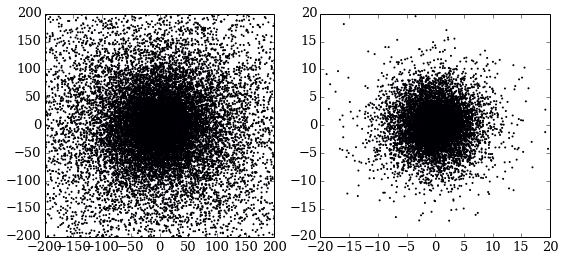

In [16]:
figure(figsize=(14, 4))
subplot(1, 3, 1)
scatter(x_sim_mw, z_sim_mw, s=1.0)
xlim(-200, 200)
ylim(-200, 200)

subplot(1, 3, 2)
scatter(x_disk, y_disk, s=1.0)
xlim(-20, 20)
ylim(-20, 20)

(-200, 200)

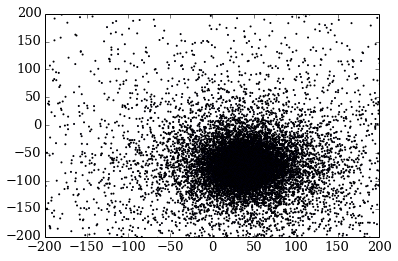

In [17]:
scatter(x_sim_lmc, z_sim_lmc, s=1.0)
xlim(-200, 200)
ylim(-200, 200)

In [18]:
X_sim_mwCM, Y_sim_mwCM, Z_sim_mwCM, vX_sim_mwCM, vY_sim_mwCM, vZ_sim_mwCM = CM(x_sim_mw, y_sim_mw, z_sim_mw, vx_sim_mw, vy_sim_mw, vz_sim_mw, 0.5)
X_sim_lmcCM, Y_sim_lmcCM, Z_sim_lmcCM, vX_sim_lmcCM, vY_sim_lmcCM, vZ_sim_lmcCM = CM(x_sim_lmc, y_sim_lmc, z_sim_lmc, vx_sim_lmc, vy_sim_lmc, vz_sim_lmc, 0.1)

print X_sim_mwCM[-1], Y_sim_mwCM[-1], Z_sim_mwCM[-1]

18860
7179
-0.192163784962 -0.564321863816 -0.384675140219


In [19]:
X_sim_disk, Y_sim_disk, Z_sim_disk, vX_sim_disk, vY_sim_disk, vZ_sim_disk = CM(x_disk, y_disk, z_disk, vx_disk, vy_disk, vz_disk, 0.01)
X_sim_bulge, Y_sim_bulge, Z_sim_bulge, vX_sim_bulge, vY_sim_bulge, vZ_sim_bulge = CM(x_bulge, y_bulge, z_bulge, vx_bulge, vy_bulge, vz_bulge, 0.01)

print len(X_sim_disk)
print len(X_sim_bulge)
print X_sim_disk[-1], Y_sim_disk[-1], Z_sim_disk[-1]
print X_sim_bulge[-1], Y_sim_bulge[-1], Z_sim_bulge[-1]

9917
9119
2
11
-0.0197111796958 0.0490153971321 0.00252089308577
0.0131956816426 0.0182834612276 0.0418945071545


In [20]:
print vX_sim_mwCM[-1], vY_sim_mwCM[-1], vZ_sim_mwCM[-1]
print vX_sim_disk[-1], vY_sim_disk[-1], vZ_sim_disk[-1]
print vX_sim_bulge[-1], vY_sim_bulge[-1], vZ_sim_bulge[-1]

0.364063872158 0.25492749826 -0.552646453307
-2.22825624559 -0.472409032076 0.0510102072298
0.806298897734 -0.373559706853 0.225122153308


In [21]:
Rcmmw = np.zeros(len(X_sim_mwCM))
Rlmc = np.zeros(len(X_sim_lmcCM))
Rdisk = np.zeros(len(X_sim_disk))
Rbulge = np.zeros(len(X_sim_bulge))

Vcmmw = np.zeros(len(X_sim_mwCM))
Vlmc = np.zeros(len(X_sim_lmcCM))
Vdisk = np.zeros(len(X_sim_disk))
Vbulge = np.zeros(len(X_sim_bulge))

iterationmw = np.zeros(len(X_sim_mwCM))
iterationlmc = np.zeros(len(X_sim_lmcCM))
iterationdisk = np.zeros(len(X_sim_disk))
iterationbulge = np.zeros(len(X_sim_bulge))


for i in range(len(X_sim_mwCM)):
    Rcmmw[i] = np.sqrt(X_sim_mwCM[i]**2 + Y_sim_mwCM[i]**2 + Z_sim_mwCM[i]**2)
    Vcmmw[i] = np.sqrt(vX_sim_mwCM[i]**2 + vY_sim_mwCM[i]**2 + vZ_sim_mwCM[i]**2)
    iterationmw[i] = float(i)

for i in range(len(X_sim_lmcCM)):
    Rlmc[i] = np.sqrt(X_sim_lmcCM[i]**2 + Y_sim_lmcCM[i]**2 + Z_sim_lmcCM[i]**2)
    Vlmc[i] = np.sqrt(vX_sim_lmcCM[i]**2 + vY_sim_lmcCM[i]**2 + vZ_sim_lmcCM[i]**2)
    iterationlmc[i] = float(i)

for i in range(len(X_sim_disk)):
    Rdisk[i] = np.sqrt(X_sim_disk[i]**2 + Y_sim_disk[i]**2 + Z_sim_disk[i]**2)
    Vdisk[i] = np.sqrt(vX_sim_disk[i]**2 + vY_sim_disk[i]**2 + vZ_sim_disk[i]**2)
    iterationdisk[i] = float(i)
    
for i in range(len(X_sim_bulge)):
    Rbulge[i] = np.sqrt(X_sim_bulge[i]**2 + Y_sim_bulge[i]**2 + Z_sim_bulge[i]**2)
    Vbulge[i] = np.sqrt(vX_sim_bulge[i]**2 + vY_sim_bulge[i]**2 + vZ_sim_bulge[i]**2)
    iterationbulge[i] = float(i)

In [22]:
def difference(R):
    Rdif = np.zeros(len(R)-1)
    for i in range(len(R)-1):
        Rdif[i] = abs(R[i+1] - R[i])
    return Rdif

In [23]:
RdifMW = difference(Rcmmw)
Rdiflmc = difference(Rlmc)

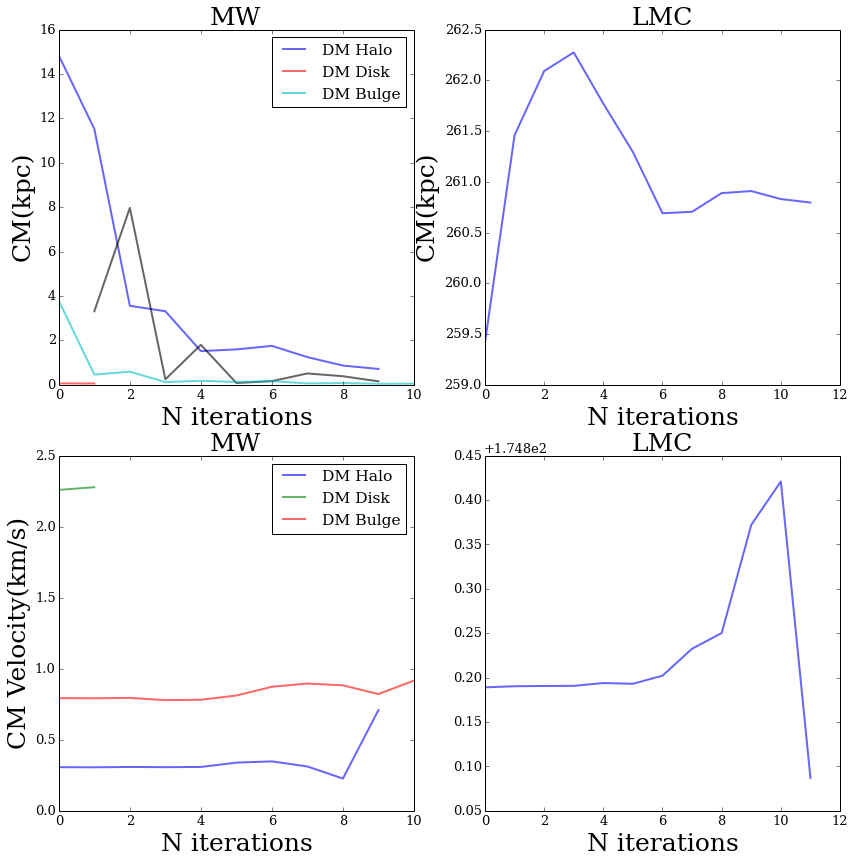

In [24]:
figure(figsize=(14, 14))

subplot(2, 2, 1)
plot(iterationmw, Rcmmw, lw=2, alpha=0.6, label='DM Halo')
plot(iterationmw[1:], RdifMW, lw=2, c='k', alpha=0.6)
plot(iterationdisk, Rdisk, lw=2, alpha=0.6, label='DM Disk')
plot(iterationbulge, Rbulge, lw=2, alpha=0.6, label='DM Bulge')
xlabel('N iterations', fontsize=25)
ylabel('CM(kpc)', fontsize=25)
title('MW', fontsize=25)
legend()

subplot(2, 2, 2)
plot(iterationlmc, Rlmc, lw=2, alpha=0.6)
#plot(iterationlmc[1:], Rdiflmc, lw=2, c='k', alpha=0.6)
xlabel('N iterations', fontsize=25)
ylabel('CM(kpc)', fontsize=25)
title('LMC', fontsize=25)

subplot(2, 2, 3)
plot(iterationmw, Vcmmw, lw=2, alpha=0.6, label='DM Halo')
#plot(iterationmw[1:], VdifMW, lw=2, c='k', alpha=0.6)
plot(iterationdisk, Vdisk, lw=2, alpha=0.6, label='DM Disk')
plot(iterationbulge, Vbulge, lw=2, alpha=0.6, label='DM Bulge')
xlabel('N iterations', fontsize=25)
ylabel('CM Velocity(km/s)', fontsize=25)
title('MW', fontsize=25)
legend()

subplot(2, 2, 4)
plot(iterationlmc, Vlmc, lw=2, alpha=0.6)
#plot(iterationlmc[1:], Vlmc, lw=2, c='k', alpha=0.6)
xlabel('N iterations', fontsize=25)
title('LMC', fontsize=25)


savefig('CM_computation_convergence.png', bbox_inches='tight')


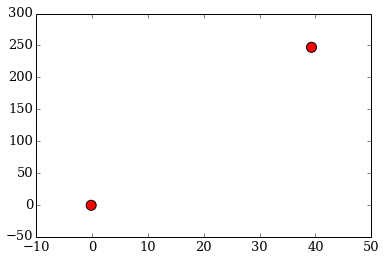

In [25]:
scatter(X_sim_mwCM[-1], Y_sim_mwCM[-1], c='r', s=100)
scatter(X_sim_lmcCM[-1], Y_sim_lmcCM[-1], c='r', s=100)

In [64]:
potbulge = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pot', 'bulge')
posbulge = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pos', 'bulge')
velbulge = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'vel', 'bulge')

pothalos = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pot', 'dm')
poshalos = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pos', 'dm')
velhalos = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'vel', 'dm')
idhalos = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pid', 'dm')


potdisk = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pot', 'disk')
posdisk = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pos', 'disk')
veldisk = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'vel', 'disk')


Returning BULGE Potential
Returning BULGE Positions
Returning BULGE Velocities
Returning DM    Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Potential
Returning DISK  Positions
Returning DISK  Velocities


In [77]:
potbulgeLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6LR_000", 'pot', 'bulge')
posbulgeLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6LR_000", 'pos', 'bulge')
velbulgeLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6LR_000", 'vel', 'bulge')

pothalosLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6LR_000", 'pot', 'dm')
poshalosLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6LR_000", 'pos', 'dm')
velhalosLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6LR_000", 'vel', 'dm')
idhalosLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6LR_000", 'pid', 'dm')


potdiskLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6LR_000", 'pot', 'disk')
posdiskLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6LR_000", 'pos', 'disk')
veldiskLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6LR_000", 'vel', 'disk')

Could not determine file type by extension!


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [37]:
CMpot = where(potbulge == min(potbulge))
XCMbulge, YCMbulge, ZCMbulge = posbulge[CMpot, 0], posbulge[CMpot, 1], posbulge[CMpot, 2]
Xbulge, Ybulge, Zbulge = posbulge[:, 0], posbulge[:, 1], posbulge[:, 2]
vXbulge, vYbulge, vZbulge = velbulge[:, 0], velbulge[:, 1], velbulge[:, 2]


print XCMbulge, YCMbulge, ZCMbulge 

[[-1.61738527]] [[-5.86820316]] [[-4.73749733]]


In [52]:
xbulge, ybulge,zbulge, vxbulge, vybulge, vzbulge = CM(Xbulge, Ybulge, Zbulge, vXbulge, vYbulge, vZbulge, 0.01)


2150


In [53]:
print xbulge[-1] - XCMbulge
print ybulge[-1] - YCMbulge
print zbulge[-1] - ZCMbulge

[[-0.02869833]]
[[ 0.02588797]]
[[-0.00693893]]


(-7, -5)

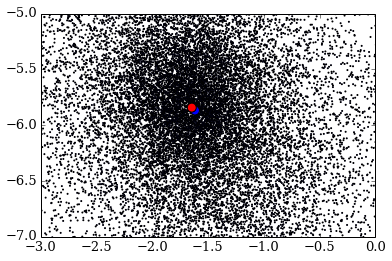

In [63]:
scatter(Xbulge, Ybulge, s=1)
scatter(XCMbulge, YCMbulge, s=80, c='b')
scatter(xbulge[-1], ybulge[-1], s=80, c='r')

xlim(-3, 0)
ylim(-7, -5)

In [76]:
X = sort(idhalos)
limit = X[299999]
print limit
index_mwHR = where(particles_ids<=limit)[0]
index_LMCHR = where(particles_ids>limit)[0]
print len(index_mwHR)
print len(index_LMCHR)

358126
60000
0


In [73]:
Xmwhalo, Ymwhalo, Zmwhalo = posbulge[index_mwHR, 0], posbulge[index_mwHR, 1], posbulge[index_mwHR, 2]


IndexError: index 30000 is out of bounds for axis 0 with size 30000

In [74]:
print len(X)

330000


In [ ]:
h = hist2d(X)